# Georeferenced Data

## Computational representation of geometries using `Meshes`

### Geometries

In [1]:
import CairoMakie: save, Axis, Figure
using Meshes, MeshViz

#### Points, vectors and segments

A **Point** represent a exact location in space. It can be represented in an
n-dimensional space. See below to represent a Point in 1, 2 and 3 dimensional spate.

In [2]:
Point(10)
Point(10, 10)
Point(10, 10, 10)

Point(10.0, 10.0, 10.0)

A `Point` and other geometries can be visualized using the `viz` function of the
`MeshViz` package.

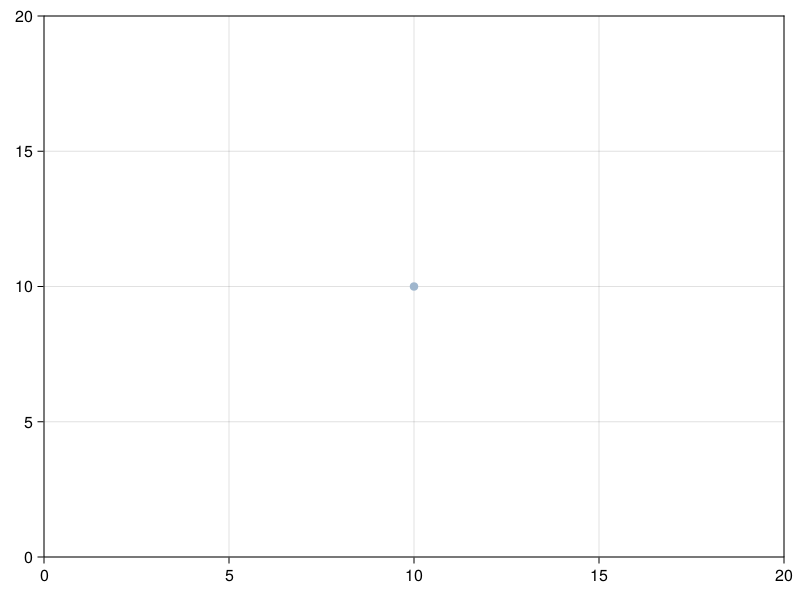

In [3]:
fig = viz(Point(10, 10))

A **Vector** is an object with magnitud and direction.

In [4]:
Vec((3, 4))
Point(10, 10) - Point(3, 5)

2-element Meshes.Vec2 with indices SOneTo(2):
 7.0
 5.0

The sum of a **Vector** to a **Point** provides another **Point**.

In [5]:
Point(10, 10) + Vec(3, 4)

Point(13.0, 14.0)

The sum of two **Vectors** is another **Vector**.

In [6]:
Vec(1, 1) + Vec(3, 4)

2-element Meshes.Vec2 with indices SOneTo(2):
 4.0
 5.0

A **Segment** is bounded by to distinct end points. It cointains every element between
the endpoinst.

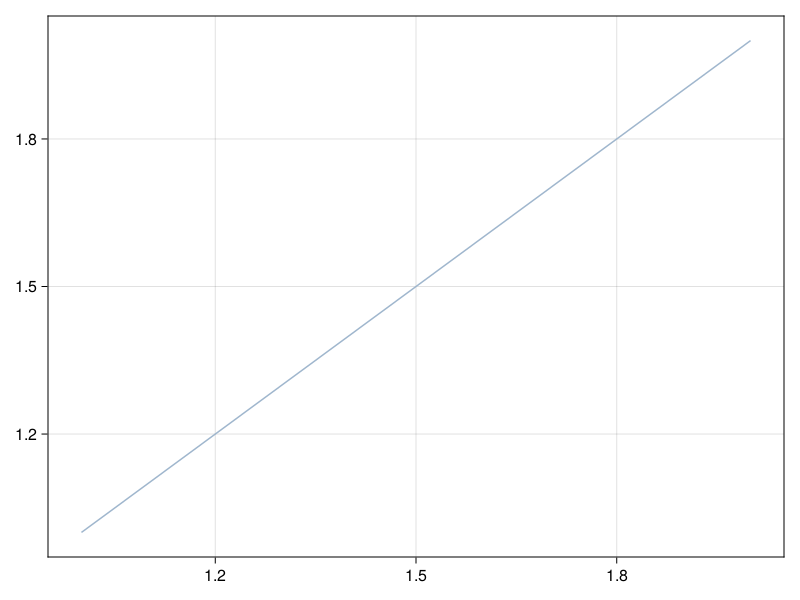

In [7]:
ss = Segment(Point(1, 1), Point(2, 2))
fig = viz(ss)

You can define in other dimensions. For example 3D.

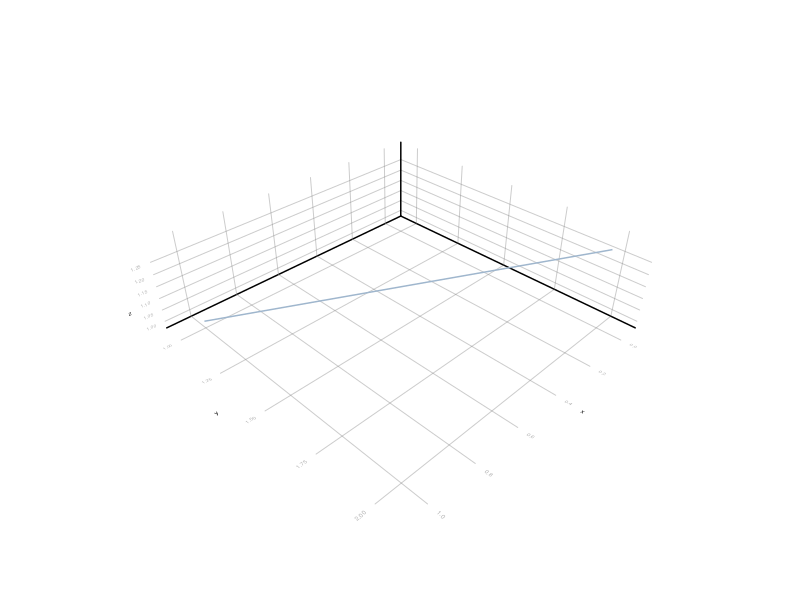

In [8]:
ss = Segment(Point(1, 1, 1), Point(0, 2, 1.3))
fig = viz(ss)

#### Primitives geometries

A **Box** in 2D is a rectangle.

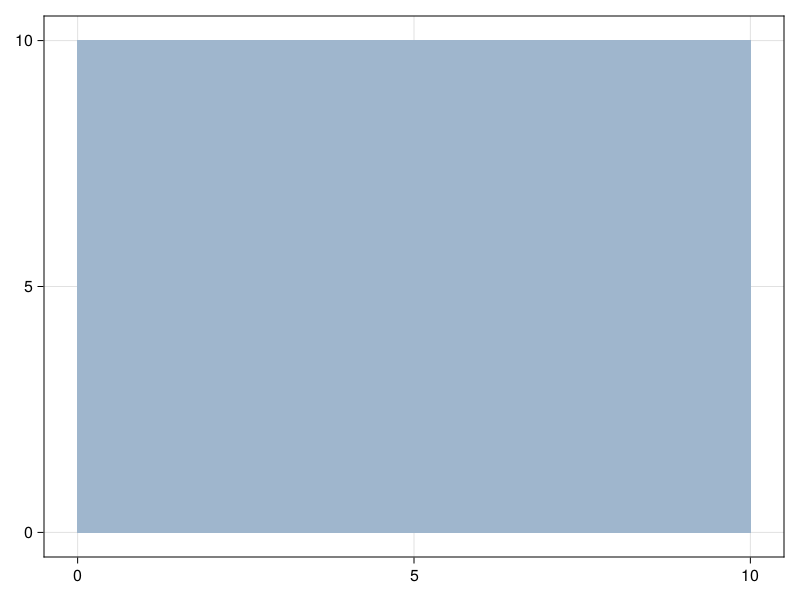

In [9]:
b  = Box((0, 0), (10, 10))
fig = viz(b)

Some properties of these elements can be obtained.

In [10]:
extrema(b)

(Point(0.0, 0.0), Point(10.0, 10.0))

In [11]:
centroid(b)

Point(5.0, 5.0)

In [12]:
measure(b)

100.0

In 3D, is a cube.

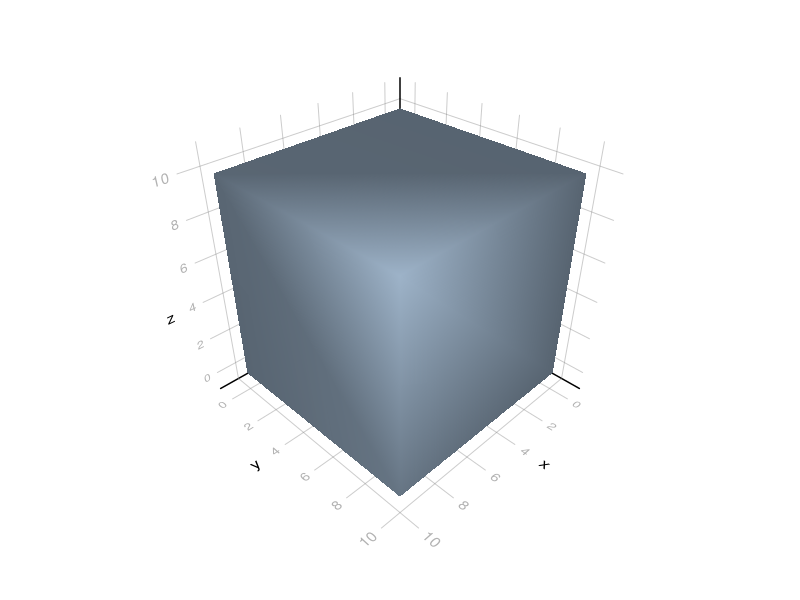

In [13]:
b  = Box((0, 0, 0), (10, 10, 10))
fig = viz(b)

A **Ball**.

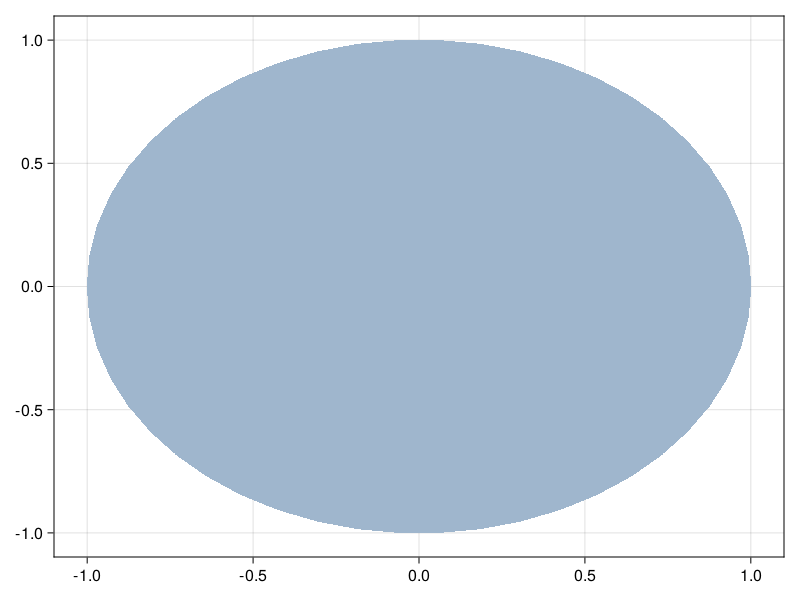

In [14]:
b  = Ball((0, 0), 1)
fig = viz(b)

In [15]:
radius(b)

1.0

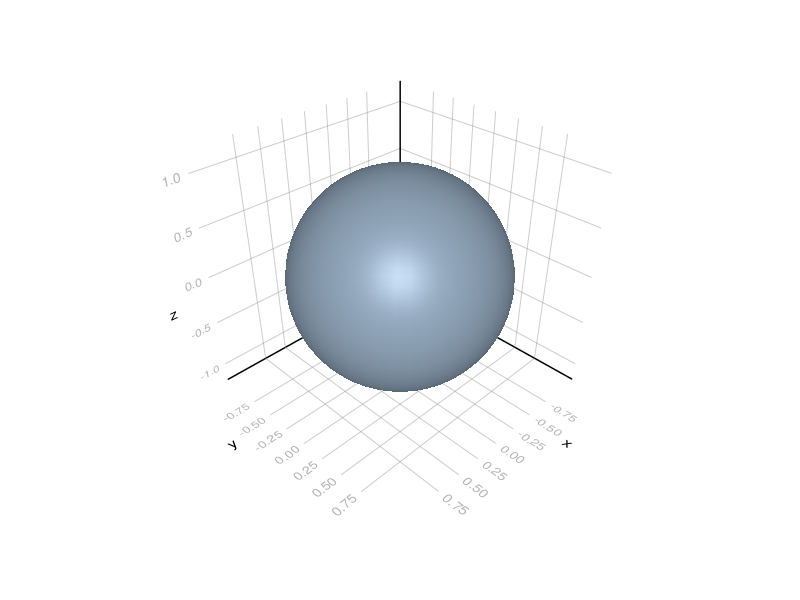

In [16]:
b  = Ball((0, 0, 0), 1)
fig = viz(b)

#### Polytopes

Geometries with flat sides such as a Segment.

A **Triangle**.

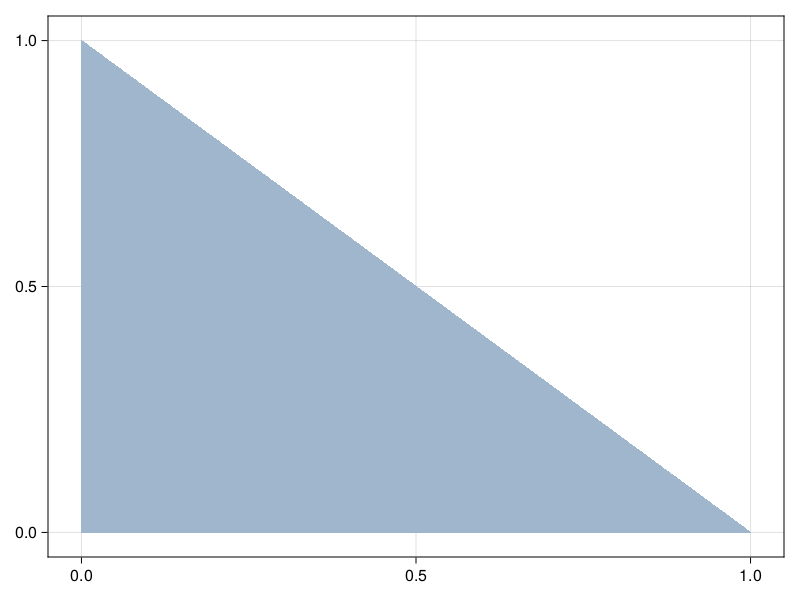

In [17]:
t = Triangle((0.0, 0.0), (1.0, 0.0), (0.0, 1.0))
fig = viz(t)

A **Quadrangle**.

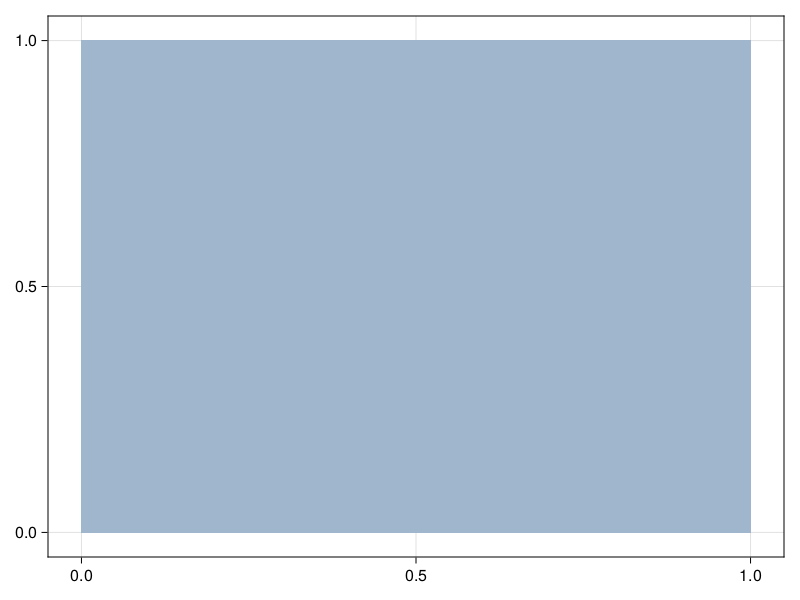

In [18]:
t = Quadrangle((0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0))
fig = viz(t)

A **Polyarea** commonly named "Polygon".

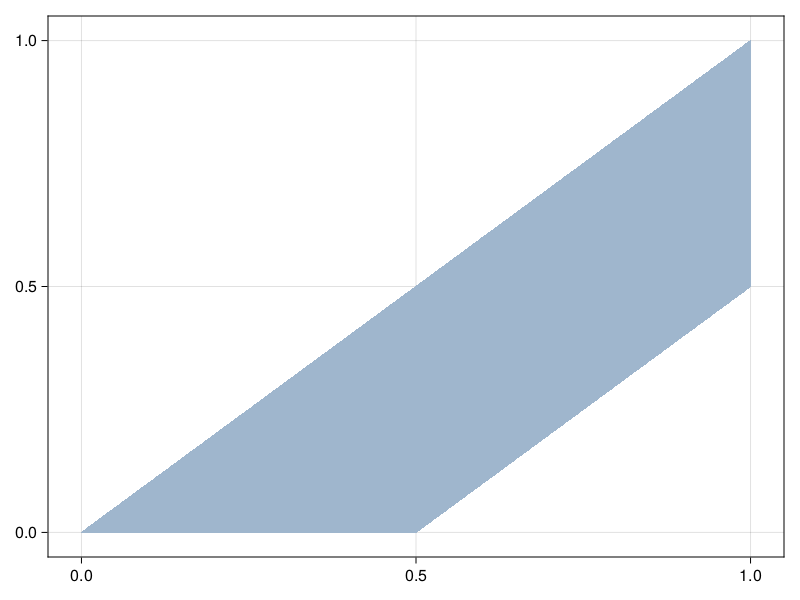

In [19]:
pp = PolyArea((0.0,0.0), (1.0,1.0), (1.0, 0.5), (0.5, 0.0))
fig = viz(pp)

In [20]:
orientation(pp)

:CCW

Some interesting methods can be apply. For example:

In [21]:
Point(0.5, 0.4) in pp

true

In [22]:
map(x -> x in pp, [Point(0.5, 0.4), Point(0.5, 0.8)])

2-element Vector{Bool}:
 1
 0

Polygonal **Chain** commonly names as "StringLine" can be created with a sequence of
points.

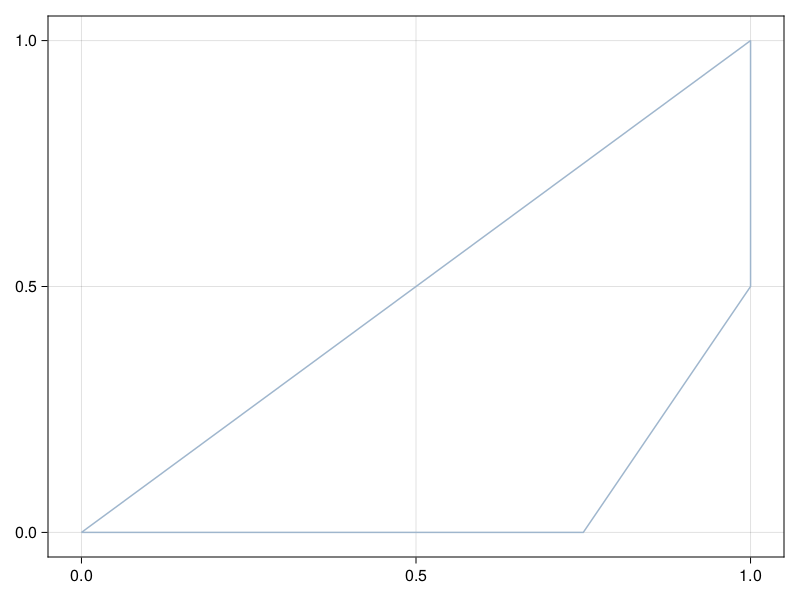

In [23]:
cc = Meshes.Ring((0.0,0.0), (1.0,1.0), (1.0, 0.5), (0.75, 0.0))
fig = viz(cc)

We can also obtain the borders of a `PolyArea` using `rings`.

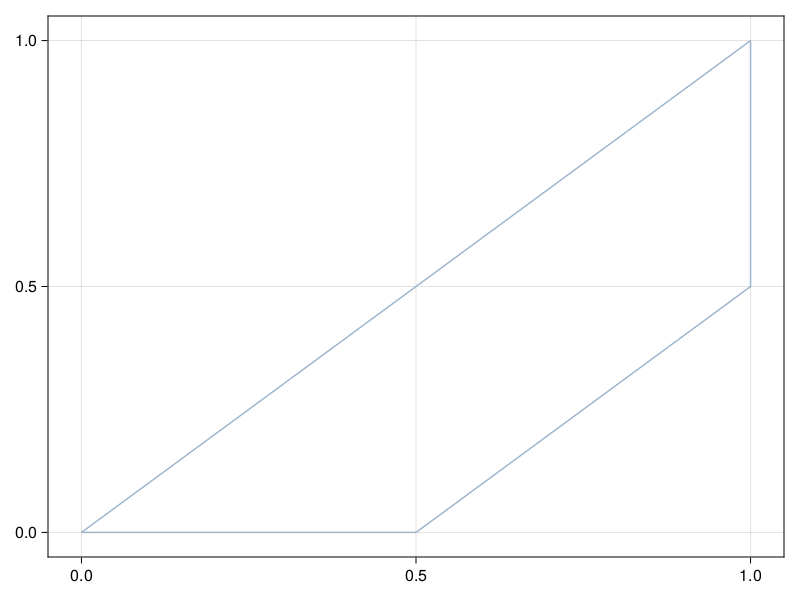

In [24]:
p1 = PolyArea((0.0,0.0), (1.0,1.0), (1.0, 0.5), (0.5, 0.0))
pp = rings(p1)[1]
fig = viz(pp)

The chain can be reversed.

In [25]:
orientation(pp)

:CCW

In [26]:
reverse(pp)

Meshes.Ring{2,Float64}
  └─Point(0.0, 0.0)
  └─Point(1.0, 1.0)
  └─Point(1.0, 0.5)
  └─Point(0.5, 0.0)

In [27]:
reverse(pp) |> orientation

:CW

We can also obtain the vertices of the chain.

In [28]:
vertices(pp)

4-element CircularVector(::Vector{Meshes.Point2}):
 Point(0.0, 0.0)
 Point(0.5, 0.0)
 Point(1.0, 0.5)
 Point(1.0, 1.0)

An even obtain the inner angles

In [29]:
innerangles(pp) * 180 / pi

4-element Vector{Float64}:
  45.0
 135.0
 135.0
  45.0

#### Meshes

A **Mesh** is a collection of vertices, edges and faces that defines a polyhedral
object.

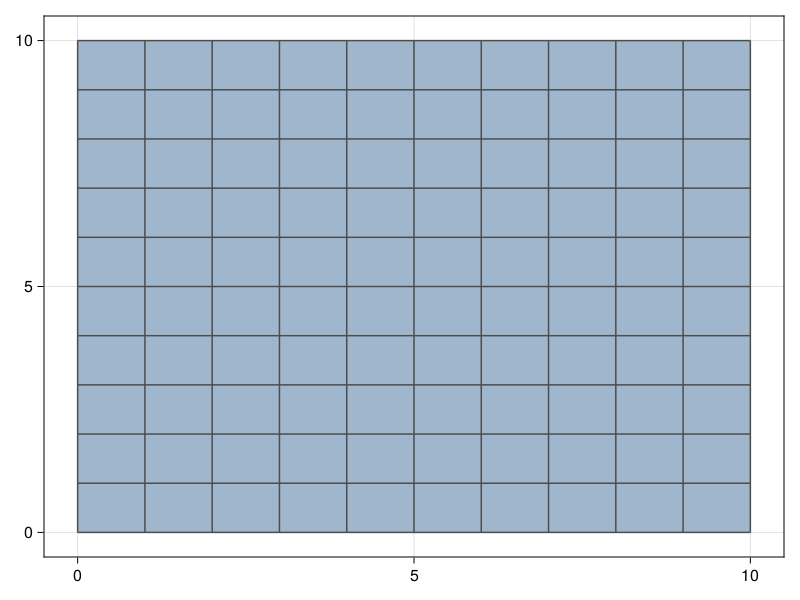

In [30]:
g = CartesianGrid(10, 10)
pp = viz(g, showfacets = true)

The elements are *Quadrangle*.

In [31]:
elements(g) |> collect

100-element Vector{Meshes.Quadrangle{2, Float64, Vector{Meshes.Point2}}}:
 Meshes.Quadrangle(Point(0.0, 0.0), Point(1.0, 0.0), Point(1.0, 1.0), Point(0.0, 1.0))
 Meshes.Quadrangle(Point(1.0, 0.0), Point(2.0, 0.0), Point(2.0, 1.0), Point(1.0, 1.0))
 Meshes.Quadrangle(Point(2.0, 0.0), Point(3.0, 0.0), Point(3.0, 1.0), Point(2.0, 1.0))
 Meshes.Quadrangle(Point(3.0, 0.0), Point(4.0, 0.0), Point(4.0, 1.0), Point(3.0, 1.0))
 Meshes.Quadrangle(Point(4.0, 0.0), Point(5.0, 0.0), Point(5.0, 1.0), Point(4.0, 1.0))
 Meshes.Quadrangle(Point(5.0, 0.0), Point(6.0, 0.0), Point(6.0, 1.0), Point(5.0, 1.0))
 Meshes.Quadrangle(Point(6.0, 0.0), Point(7.0, 0.0), Point(7.0, 1.0), Point(6.0, 1.0))
 Meshes.Quadrangle(Point(7.0, 0.0), Point(8.0, 0.0), Point(8.0, 1.0), Point(7.0, 1.0))
 Meshes.Quadrangle(Point(8.0, 0.0), Point(9.0, 0.0), Point(9.0, 1.0), Point(8.0, 1.0))
 Meshes.Quadrangle(Point(9.0, 0.0), Point(10.0, 0.0), Point(10.0, 1.0), Point(9.0, 1.0))
 ⋮
 Meshes.Quadrangle(Point(1.0, 9.0), Point(2.0, 9.0)

Let's btain the centroids.

In [32]:
centroid.(g)

100-element Vector{Meshes.Point2}:
 Point(0.5, 0.5)
 Point(1.5, 0.5)
 Point(2.5, 0.5)
 Point(3.5, 0.5)
 Point(4.5, 0.5)
 Point(5.5, 0.5)
 Point(6.5, 0.5)
 Point(7.5, 0.5)
 Point(8.5, 0.5)
 Point(9.5, 0.5)
 ⋮
 Point(1.5, 9.5)
 Point(2.5, 9.5)
 Point(3.5, 9.5)
 Point(4.5, 9.5)
 Point(5.5, 9.5)
 Point(6.5, 9.5)
 Point(7.5, 9.5)
 Point(8.5, 9.5)
 Point(9.5, 9.5)

Let's plot the grid with centroids.

In [33]:
pp = viz(g, showfacets = true)
viz!(centroid.(g), color = :red)
viz!(vertices(g), color = :blue)

MakieCore.Combined{MeshViz.viz, Tuple{Vector{Meshes.Point2}}}

#### GeometrySet

A set of geometries can be defined using `GeometrySet` or `PointSet`.

In [34]:
ps = PointSet(rand(Point2, 100))
fig = Figure()
Axis(fig[1,1], title = "Set of Points", xlabel = "x-axis", ylabel = "y-axis")
viz!(ps, color = :red)

MakieCore.Combined{MeshViz.viz, Tuple{Meshes.PointSet{2, Float64}}}

In [35]:
gset = GeometrySet([
    Triangle((0.0, 0.0), (1.0, 0.0), (0.0, 1.0)),
    Quadrangle((2.0, 2.0), (3.0, 2.0), (3.0, 3.0), (2.0, 3.0)),
    Box((1, 1), (2, 2))
])
fig = Figure()
Axis(fig[1,1], title = "Set of Geometries", xlabel = "x-axis", ylabel = "y-axis")
viz!(gset)

MakieCore.Combined{MeshViz.viz, Tuple{Meshes.GeometrySet{2, Float64, Meshes.Geometry{2, Float64}}}}

### Sampling

We can sample elements inside a geometry.

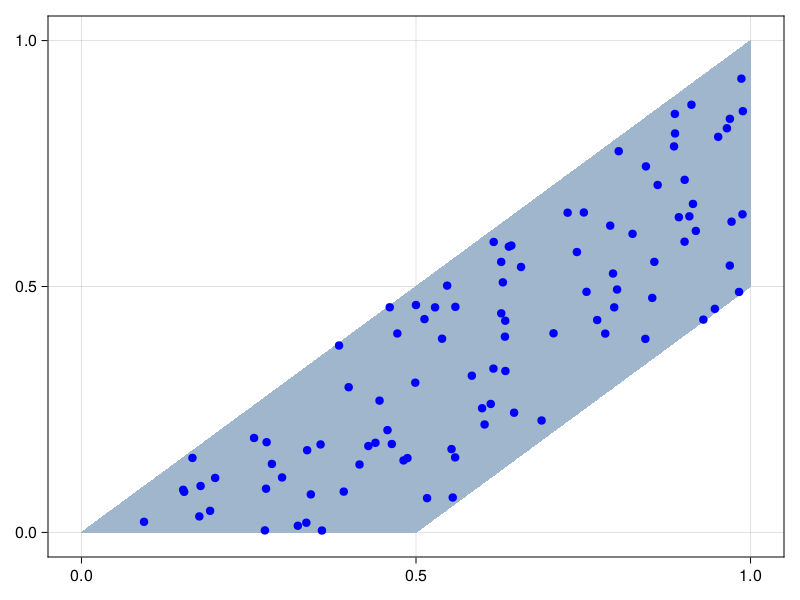

In [36]:
region = PolyArea((0.0,0.0), (1.0,1.0), (1.0, 0.5), (0.5, 0.0))
region_ps = sample(region, HomogeneousSampling(100)) |> collect
pp = viz(region)
viz!(region_ps, color = :blue)
pp

In [37]:
region = Ring((0.0,0.0), (1.0,1.0), (1.0, 0.5), (0.5, 0.0))
region_ps = sample(region, HomogeneousSampling(20)) |> collect
pp = viz(region)
pp
viz!(region_ps, color = :blue)

MakieCore.Combined{MeshViz.viz, Tuple{Vector{Meshes.Point2}}}

We can also obtain sistematic samples from a geometry.

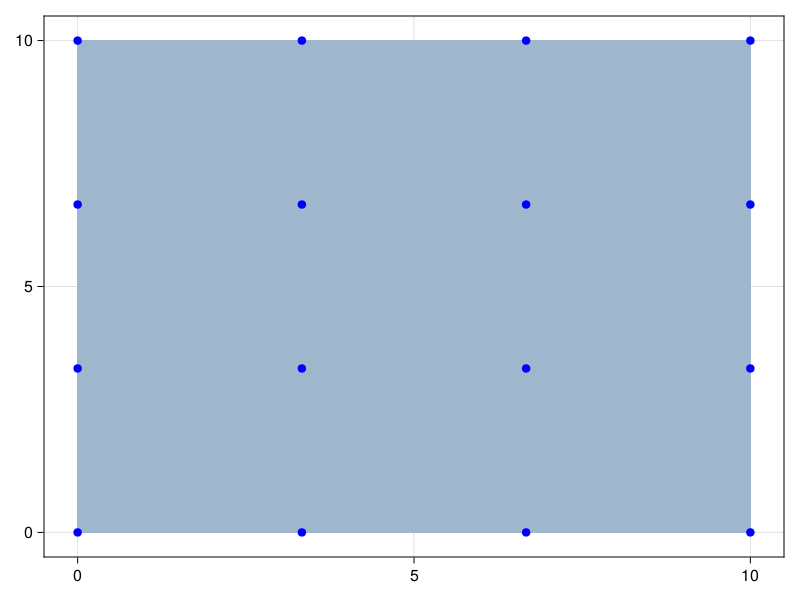

In [38]:
region  = Box((0, 0), (10, 10))
region_ps = sample(region, RegularSampling(4,4)) |> collect
pp = viz(region)
viz!(region_ps, color = :blue)
pp

We can also sample elements from a mesh or collection of geometries.

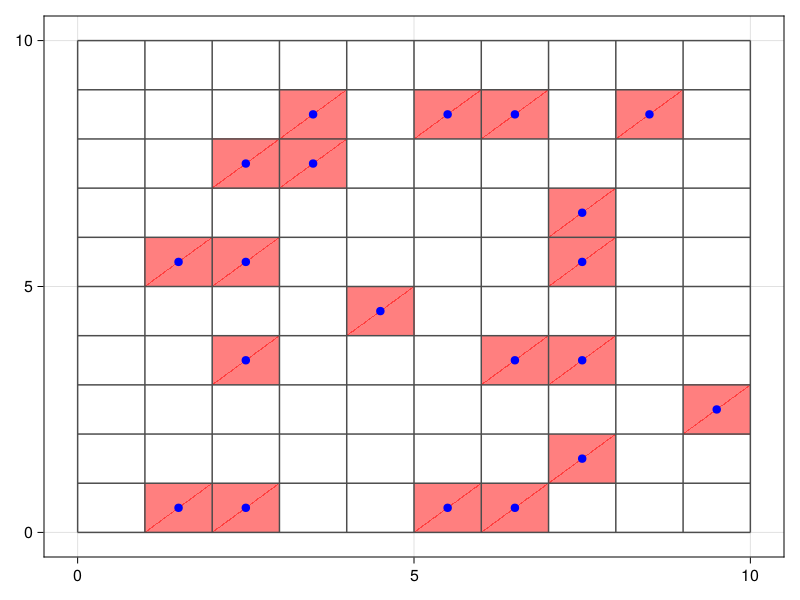

In [39]:
g = CartesianGrid(10, 10)
g_ps = sample(g, 20)
pp = viz(g_ps, alpha = 0.5, color = :red)
viz!(g, showfacets = true, alpha = 0)
viz!(centroid.(g_ps), color = :blue)
pp

## Georeferenced data

Observed data can be georeferenced to attach observations to spatial geometries.

In [40]:
import CairoMakie: save
using Meshes, MeshViz
using DataFrames

include(joinpath("..", "src", "meshes.jl"))

vizpp (generic function with 4 methods)

### CartesianGrid

Let's consider a DataFrame cointaining the variables `id` and `temperature`.

In [41]:
df = DataFrame(id = 1:100, temperature = randn(100))

100×2 DataFrame
 Row │ id     temperature
     │ Int64  Float64
─────┼────────────────────
   1 │     1     0.286078
   2 │     2    -0.28007
   3 │     3     0.565005
   4 │     4    -0.742406
   5 │     5     1.88072
   6 │     6     0.443192
   7 │     7    -1.49518
   8 │     8    -0.24061
  ⋮  │   ⋮         ⋮
  94 │    94     0.759421
  95 │    95    -0.203393
  96 │    96    -0.075488
  97 │    97     0.298743
  98 │    98     1.28642
  99 │    99     0.266783
 100 │   100    -1.32774
           85 rows omitted

This can be easily georeferenced using the `meshdata` function. Let's assume that this
data is asociated to a CartesianGrid.

In [42]:
df_grid = meshdata(CartesianGrid(10, 10), etable = df)

10×10 CartesianGrid{2,Float64}
  variables (rank 2)
    └─id (Int64)
    └─temperature (Float64)

We can acces the spatial domain or the data using the functions `domain` and `values`
respectively.

In [43]:
domain(df_grid)

10×10 CartesianGrid{2,Float64}
  minimum: Point(0.0, 0.0)
  maximum: Point(10.0, 10.0)
  spacing: (1.0, 1.0)

In [44]:
values(df_grid)

100×2 DataFrame
 Row │ id     temperature
     │ Int64  Float64
─────┼────────────────────
   1 │     1     0.286078
   2 │     2    -0.28007
   3 │     3     0.565005
   4 │     4    -0.742406
   5 │     5     1.88072
   6 │     6     0.443192
   7 │     7    -1.49518
   8 │     8    -0.24061
  ⋮  │   ⋮         ⋮
  94 │    94     0.759421
  95 │    95    -0.203393
  96 │    96    -0.075488
  97 │    97     0.298743
  98 │    98     1.28642
  99 │    99     0.266783
 100 │   100    -1.32774
           85 rows omitted

We can work similarly than a DataFrame.

In [45]:
df_grid[1, :]

(id = 1, temperature = 0.2860781979898572, geometry = Meshes.Quadrangle(Point(0.0, 0.0), Point(1.0, 0.0), Point(1.0, 1.0), Point(0.0, 1.0)))

In [46]:
df_grid[1:5, :]

5 View{10×10 CartesianGrid{2,Float64}}
  variables (rank 2)
    └─id (Int64)
    └─temperature (Float64)

In [47]:
df_grid[1, :geometry]

Meshes.Quadrangle{2,Float64}
  └─Point(0.0, 0.0)
  └─Point(1.0, 0.0)
  └─Point(1.0, 1.0)
  └─Point(0.0, 1.0)

In [48]:
df_grid[1:5, :temperature]

5-element Vector{Float64}:
  0.2860781979898572
 -0.28007033575961693
  0.5650050621362036
 -0.7424055067384826
  1.8807248952054942

In [49]:
df_grid.temperature

100-element Vector{Float64}:
  0.2860781979898572
 -0.28007033575961693
  0.5650050621362036
 -0.7424055067384826
  1.8807248952054942
  0.44319248831211944
 -1.4951782124262105
 -0.24061035074540066
 -1.0814427242699758
  0.10068100370257543
  ⋮
  1.584724196157663
 -0.5340820010000373
  0.7594208167722214
 -0.2033932754276574
 -0.07548800895483672
  0.29874250255824486
  1.2864191649643144
  0.2667831844499786
 -1.3277385754430024

Let's check the order.

In [50]:
pp = viz(domain(df_grid), showfacets = true)
viz!(df_grid[1:5, :geometry], color = :red, alpha = 0.3)

MakieCore.Combined{MeshViz.viz, Tuple{Meshes.DomainView{2, Float64, Meshes.CartesianGrid{2, Float64}, UnitRange{Int64}}}}

We can also visualize the variables of interest.

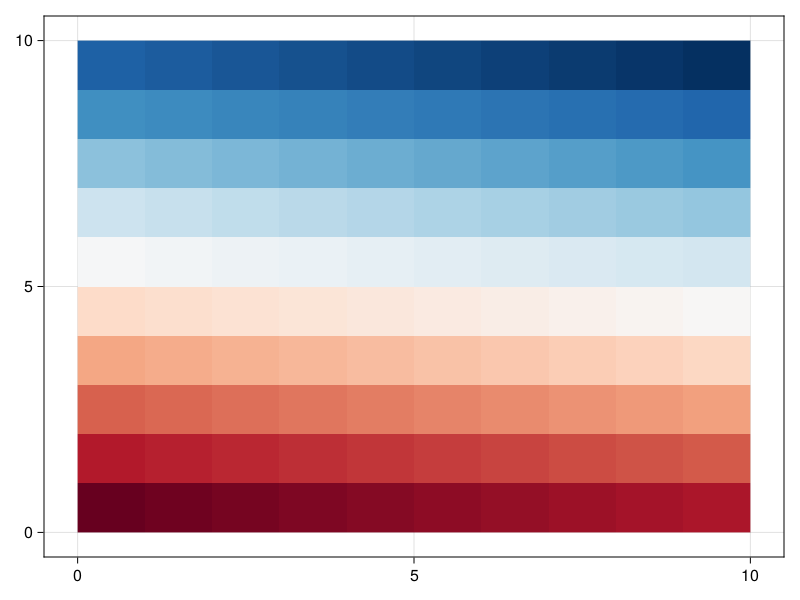

In [51]:
pp = viz(df_grid.geometry, color = df_grid.id, colorscheme = :RdBu)

You can also use our custom function `vis` that adds a colorbar.

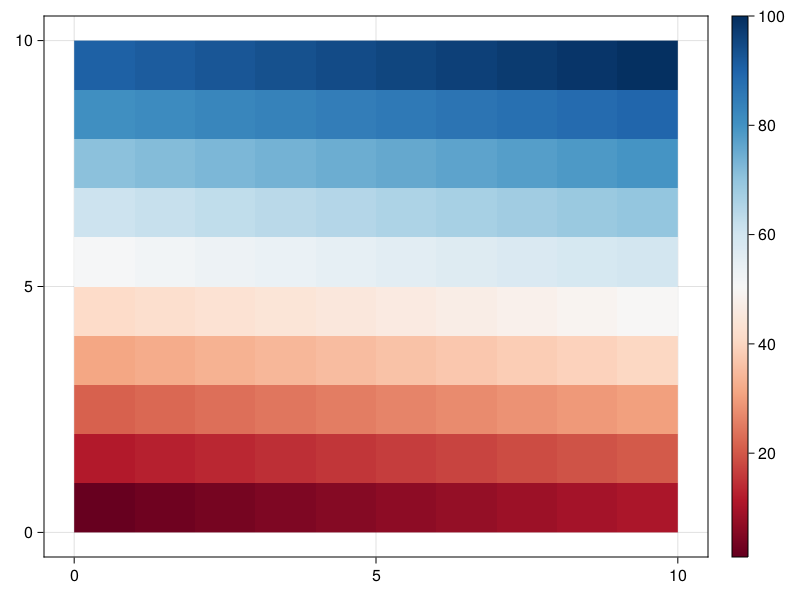

In [52]:
pp = vis(df_grid, variable = :id, colorscheme = :RdBu)

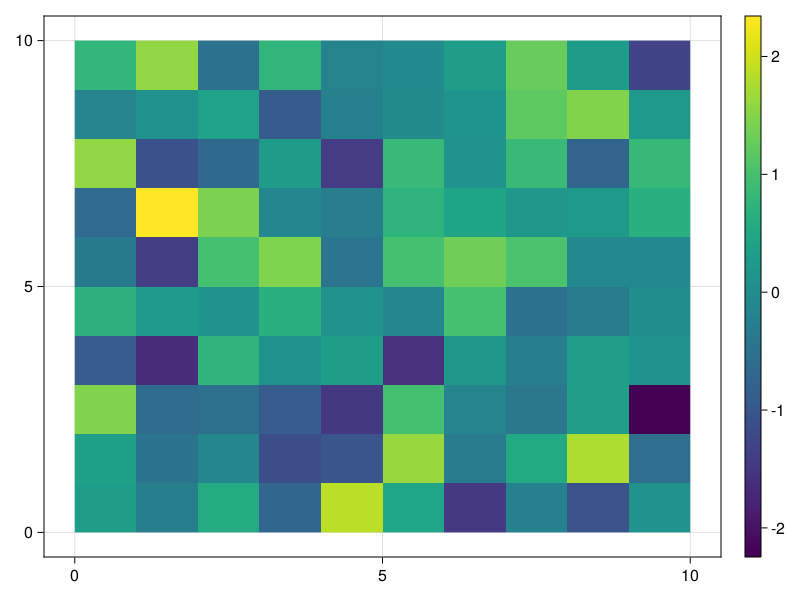

In [53]:
pp = vis(df_grid, variable = :temperature, colorscheme = :viridis)

More information about colors can be found at [Makie-colors](https://docs.makie.org/stable/documentation/colors).

### PointSet

In [54]:
df_points = meshdata(PointSet(rand(2, 100)), etable = df)

df_points[1, :]

(id = 1, temperature = 0.2860781979898572, geometry = Point(0.3869727269993176, 0.4145792577315748))

In [55]:
df_points[1:5, :]

5 View{100 PointSet{2,Float64}}
  variables (rank 0)
    └─id (Int64)
    └─temperature (Float64)

In [56]:
df_points[1, :geometry]

Point(0.3869727269993176, 0.4145792577315748)

In [57]:
df_points[1:5, :temperature]

5-element Vector{Float64}:
  0.2860781979898572
 -0.28007033575961693
  0.5650050621362036
 -0.7424055067384826
  1.8807248952054942

visualize.

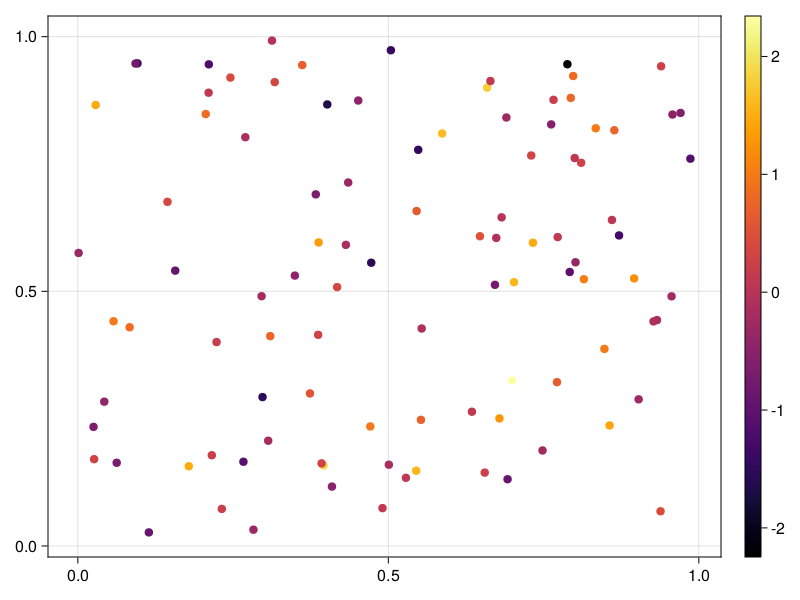

In [58]:
pp = vis(df_points, variable = :temperature, colorscheme = :inferno)

### GeometrySet

In [59]:
gset = GeometrySet([
    Triangle((0.0, 0.0), (1.0, 0.0), (0.0, 1.0)),
    Quadrangle((2.0, 2.0), (3.0, 2.0), (3.0, 3.0), (2.0, 3.0)),
    Box((1, 1), (2, 2))
])
df_geom = meshdata(gset, etable = DataFrame(id = 1:3, area = area.(gset)))

3 GeometrySet{2,Float64}
  variables (rank 2)
    └─id (Int64)
    └─area (Float64)

Visualize.

In [60]:
pp = vis(df_geom, variable = :id, showfacets = true)

# GDAL

import ArchGDAL as AG
using Plots

Creating geometries

In [61]:
point = AG.createpoint(1.0, 2.0)
multipoint = AG.createmultipoint([(1.0, 1.5), (0.5, 1.5), (2.0, 1.5)])
line = AG.createlinestring([(0.0, 0.0), (0.5, 1.0), (2.0, 2.0)])
polygon = AG.createpolygon([(2.0, 0.0), (1.75, 1.0), (1., 1.), (0.5, 0.5), (2.0, 0.0)])

Geometry: POLYGON ((2 0,1.75 1.0,1 1,0.5 0.5,2 0))

Plotting

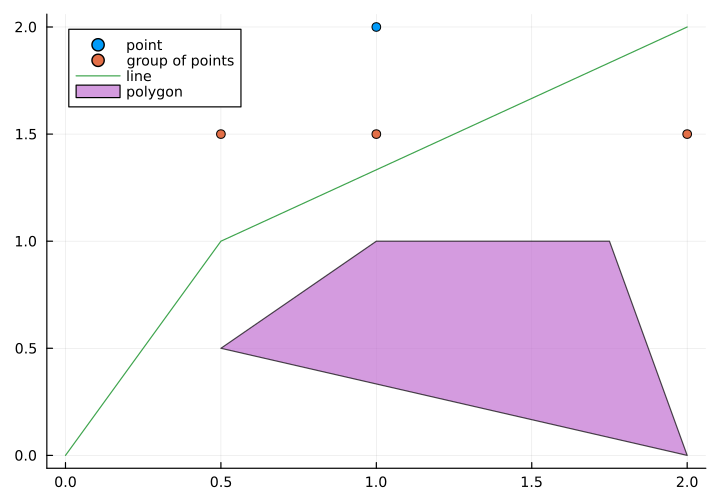

In [62]:
plot(point, label = "point")
plot!(multipoint, label = "group of points")
plot!(line, label = "line")
plot!(polygon, alpha = 0.7, label = "polygon", legend = :topleft)

Some operations

In [63]:
AG.getcoorddim(point)

2

In [64]:
AG.getx(point, 0)

1.0

In [65]:
AG.gety(point, 0)

2.0

In [66]:
AG.getpoint(point, 0)

(1.0, 2.0, 0.0)

In [67]:
AG.geomdim(point)

0

In [68]:
AG.geomdim(line)

1

In [69]:
AG.geomdim(polygon)

2

In [70]:
AG.envelope(polygon)

GDAL.OGREnvelope(0.5, 2.0, 0.0, 1.0)

In [71]:
AG.geomlength(line)

2.9208096264818897

In [72]:
AG.geomarea(polygon)

0.875

In [73]:
AG.within(polygon, point)

false

Transform coordinates

In [74]:
bla = AG.createpoint(1120351.57, 741921.42)
AG.createcoordtrans(x -> AG.transform!(bla, x), AG.importEPSG(2927), AG.importEPSG(4326))

Geometry: POINT (47.3488070138318 -122.598149943144)

## Read and write common GIS formats

In [75]:
import CairoMakie: save, Figure, Axis
using Meshes, MeshViz
import GeoTables as GT
using Dates
using DataFrames
import Chain: @chain

include(joinpath("..", "src", "meshes.jl"))

vizpp (generic function with 4 methods)

Main paths

In [76]:
path_raw = joinpath("data", "raw")
path_cleaned = joinpath("data", "cleaned")
path_processed = joinpath("data", "processed")

"data/processed"

Obtain georeferenced precipitation for 2013 January

In [77]:
stations = GT.load(joinpath("..", path_cleaned, "senamhi-monitor-stations.gpkg"))
stations = MeshData(stations)

44 PointSet{2,Float64}
  variables (rank 0)
    └─code (Int64)
    └─name (String)
    └─altitud (Float64)

As already known, we can obtain the geometries and data associated using the function
`domain` and `values`.

In [78]:
domain(stations)

44 PointSet{2,Float64}
  └─Point(-77.55011, -11.06068)
  └─Point(-77.36839, -11.36014)
  └─Point(-77.122, -11.45281)
  └─Point(-76.7687, -10.66769)
  └─Point(-76.73701, -10.92162)
  ⋮
  └─Point(-76.13902, -12.29359)
  └─Point(-76.13672, -12.38208)
  └─Point(-76.01667, -12.11667)
  └─Point(-75.87215, -12.3444)
  └─Point(-75.82619, -12.11461)

In [79]:
values(stations)

(code = [111004, 111018, 111022, 110020, 110021, 111023, 111025, 111026, 111027, 113006  …  111091, 111092, 112096, 112124, 112126, 112127, 112128, 112130, 112133, 112135], name = ["ALCANTARILLA", "LOMAS DE LACHAY", "HUAYAN", "OYON", "PICOY", "ÑAÑA", "DONOSO", "CANTA", "MATUCANA", "CAÑETE"  …  "CARAMPOMA", "SANTIAGO DE TUNA", "YAURICOCHA", "ANTIOQUIA", "SAN LAZARO DE ESCOMARCA", "HUAÑEC", "AYAVIRI", "TANTA", "CARANIA", "VILCA"], altitud = [131.0, 416.0, 346.0, 3652.0, 3013.0, 543.0, 127.0, 2818.0, 2417.0, 116.0  …  3424.0, 2926.0, 4560.0, 1839.0, 3758.0, 3200.0, 3224.0, 4323.0, 3840.0, 3832.0])

Let's convert the dataset to a `DataFrame` to make easier to handle the data.

In [80]:
DataFrame(stations)

44×4 DataFrame
 Row │ code    name                     altitud  geometry
     │ Int64   String                   Float64  Point…
─────┼───────────────────────────────────────────────────────────────────────
   1 │ 111004  ALCANTARILLA               131.0  Point(-77.55011, -11.06068)
   2 │ 111018  LOMAS DE LACHAY            416.0  Point(-77.36839, -11.36014)
   3 │ 111022  HUAYAN                     346.0  Point(-77.122, -11.45281)
   4 │ 110020  OYON                      3652.0  Point(-76.7687, -10.66769)
   5 │ 110021  PICOY                     3013.0  Point(-76.73701, -10.92162)
   6 │ 111023  ÑAÑA                       543.0  Point(-76.84194, -11.98744)
   7 │ 111025  DONOSO                     127.0  Point(-77.23567, -11.521)
   8 │ 111026  CANTA                     2818.0  Point(-76.62569, -11.47121)
  ⋮  │   ⋮                ⋮                ⋮                  ⋮
  38 │ 112124  ANTIOQUIA                 1839.0  Point(-76.5, -12.08333)
  39 │ 112126  SAN LAZARO DE ESCOMARCA   3758.0  Point(-76.35207, -12.18088)
  40 │ 112127  HUAÑEC                    3200.0  Point(-76.13902, -12.29359)
  41 │ 112128  AYAVIRI                   3224.0  Point(-76.13672, -12.38208)
  42 │ 112130  TANTA                     4323.0  Point(-76.01667, -12.11667)
  43 │ 112133  CARANIA                   3840.0  Point(-75.87215, -12.3444)
  44 │ 112135  VILCA                     3832.0  Point(-75.82619, -12.11461)
                                                              29 rows omitted

It is better to only convert to a DataFrame the associated data.

In [81]:
stations = @chain stations begin
    values()
    DataFrame()
    meshdata(domain(stations), etable = _)
end

44 PointSet{2,Float64}
  variables (rank 0)
    └─code (Int64)
    └─name (String)
    └─altitud (Float64)

Let's check the new data

In [82]:
domain(stations)

44 PointSet{2,Float64}
  └─Point(-77.55011, -11.06068)
  └─Point(-77.36839, -11.36014)
  └─Point(-77.122, -11.45281)
  └─Point(-76.7687, -10.66769)
  └─Point(-76.73701, -10.92162)
  ⋮
  └─Point(-76.13902, -12.29359)
  └─Point(-76.13672, -12.38208)
  └─Point(-76.01667, -12.11667)
  └─Point(-75.87215, -12.3444)
  └─Point(-75.82619, -12.11461)

In [83]:
values(stations)

44×3 DataFrame
 Row │ code    name                     altitud
     │ Int64   String                   Float64
─────┼──────────────────────────────────────────
   1 │ 111004  ALCANTARILLA               131.0
   2 │ 111018  LOMAS DE LACHAY            416.0
   3 │ 111022  HUAYAN                     346.0
   4 │ 110020  OYON                      3652.0
   5 │ 110021  PICOY                     3013.0
   6 │ 111023  ÑAÑA                       543.0
   7 │ 111025  DONOSO                     127.0
   8 │ 111026  CANTA                     2818.0
  ⋮  │   ⋮                ⋮                ⋮
  38 │ 112124  ANTIOQUIA                 1839.0
  39 │ 112126  SAN LAZARO DE ESCOMARCA   3758.0
  40 │ 112127  HUAÑEC                    3200.0
  41 │ 112128  AYAVIRI                   3224.0
  42 │ 112130  TANTA                     4323.0
  43 │ 112133  CARANIA                   3840.0
  44 │ 112135  VILCA                     3832.0
                                 29 rows omitted

Let's visualize this data.

In [84]:
fig = Figure(backgroundcolor = :lightgray)
Axis(fig[1,1], title = "Meteorologial Stations of Lima",
    xlabel = "Longitud", ylabel = "Latitud")
viz!(stations.geometry, color = :blue)

MakieCore.Combined{MeshViz.viz, Tuple{Meshes.PointSet{2, Float64}}}

Transform dataset

In [85]:
transform!(values(stations), :altitud => (x -> x .^ 2) => :altitud_sq)
transform!(values(stations), :altitud => ByRow(log) => :altitud_log)

44×5 DataFrame
 Row │ code    name                     altitud  altitud_sq      altitud_log
     │ Int64   String                   Float64  Float64         Float64
─────┼───────────────────────────────────────────────────────────────────────
   1 │ 111004  ALCANTARILLA               131.0   17161.0            4.8752
   2 │ 111018  LOMAS DE LACHAY            416.0  173056.0            6.03069
   3 │ 111022  HUAYAN                     346.0  119716.0            5.84644
   4 │ 110020  OYON                      3652.0       1.33371e7      8.20303
   5 │ 110021  PICOY                     3013.0       9.07817e6      8.01069
   6 │ 111023  ÑAÑA                       543.0  294849.0            6.29711
   7 │ 111025  DONOSO                     127.0   16129.0            4.84419
   8 │ 111026  CANTA                     2818.0       7.94112e6      7.94378
  ⋮  │   ⋮                ⋮                ⋮           ⋮              ⋮
  38 │ 112124  ANTIOQUIA                 1839.0       3.38192e6      7.51698
  39 │ 112126  SAN LAZARO DE ESCOMARCA   3758.0       1.41226e7      8.23164
  40 │ 112127  HUAÑEC                    3200.0       1.024e7        8.07091
  41 │ 112128  AYAVIRI                   3224.0       1.03942e7      8.07838
  42 │ 112130  TANTA                     4323.0       1.86883e7      8.3717
  43 │ 112133  CARANIA                   3840.0       1.47456e7      8.25323
  44 │ 112135  VILCA                     3832.0       1.46842e7      8.25114
                                                              29 rows omitted

In [86]:
values(stations)

44×5 DataFrame
 Row │ code    name                     altitud  altitud_sq      altitud_log
     │ Int64   String                   Float64  Float64         Float64
─────┼───────────────────────────────────────────────────────────────────────
   1 │ 111004  ALCANTARILLA               131.0   17161.0            4.8752
   2 │ 111018  LOMAS DE LACHAY            416.0  173056.0            6.03069
   3 │ 111022  HUAYAN                     346.0  119716.0            5.84644
   4 │ 110020  OYON                      3652.0       1.33371e7      8.20303
   5 │ 110021  PICOY                     3013.0       9.07817e6      8.01069
   6 │ 111023  ÑAÑA                       543.0  294849.0            6.29711
   7 │ 111025  DONOSO                     127.0   16129.0            4.84419
   8 │ 111026  CANTA                     2818.0       7.94112e6      7.94378
  ⋮  │   ⋮                ⋮                ⋮           ⋮              ⋮
  38 │ 112124  ANTIOQUIA                 1839.0       3.38192e6      7.51698
  39 │ 112126  SAN LAZARO DE ESCOMARCA   3758.0       1.41226e7      8.23164
  40 │ 112127  HUAÑEC                    3200.0       1.024e7        8.07091
  41 │ 112128  AYAVIRI                   3224.0       1.03942e7      8.07838
  42 │ 112130  TANTA                     4323.0       1.86883e7      8.3717
  43 │ 112133  CARANIA                   3840.0       1.47456e7      8.25323
  44 │ 112135  VILCA                     3832.0       1.46842e7      8.25114
                                                              29 rows omitted

Plot based on variables.

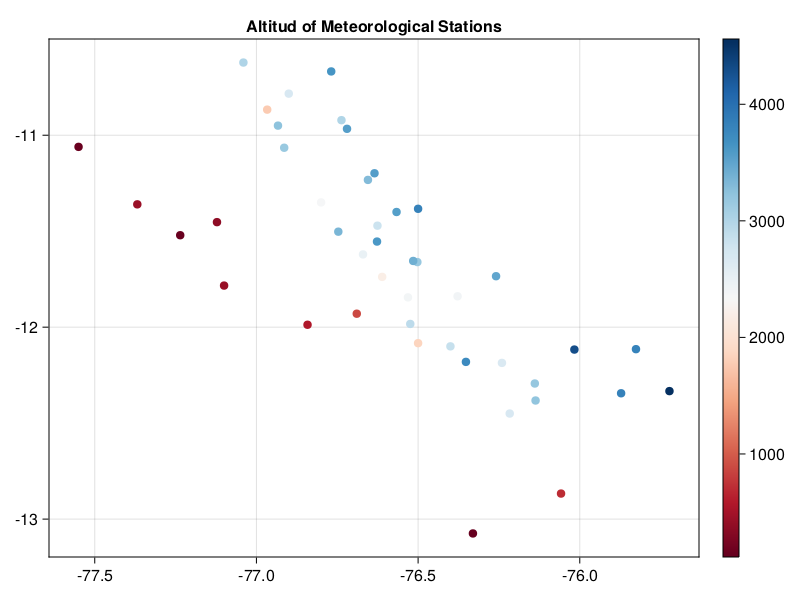

In [87]:
pp = vis(stations, variable = :altitud, colorscheme = :RdBu;
    axis = (;title = "Altitud of Meteorological Stations"))

Spatial Subsetting

In [88]:
region = Box(Point(-77.0, -12.0), Point( -76.5, -11))
fewstations = view(stations, region)

17 View{44 PointSet{2,Float64}}
  variables (rank 0)
    └─code (Int64)
    └─name (String)
    └─altitud (Float64)
    └─altitud_sq (Float64)
    └─altitud_log (Float64)

In [89]:
fig = vis(stations, variable = :altitud_log)
viz!(region, color = :red, alpha = 0.2)
viz!(fewstations.geometry, color = :blue, alpha = 0.9)

MakieCore.Combined{MeshViz.viz, Tuple{Meshes.DomainView{2, Float64, Meshes.PointSet{2, Float64}, Vector{Int64}}}}

Write the dataset

In [90]:
domain(fewstations)

17 View{44 PointSet{2,Float64}}
  └─Point(-76.84194, -11.98744)
  └─Point(-76.62569, -11.47121)
  └─Point(-76.67034, -11.62091)
  └─Point(-76.53136, -11.84481)
  └─Point(-76.68967, -11.92986)
  ⋮
  └─Point(-76.65513, -11.2328)
  └─Point(-76.62706, -11.554)
  └─Point(-76.56667, -11.4)
  └─Point(-76.51514, -11.65503)
  └─Point(-76.5242, -11.9832)

In [91]:
values(fewstations)

17×5 DataFrame
 Row │ code    name              altitud  altitud_sq      altitud_log
     │ Int64   String            Float64  Float64         Float64
─────┼────────────────────────────────────────────────────────────────
   1 │ 111023  ÑAÑA                543.0  294849.0            6.29711
   2 │ 111026  CANTA              2818.0       7.94112e6      7.94378
   3 │ 111057  ARAHUAY            2504.0       6.27002e6      7.82564
   4 │ 111058  CANCHACALLA        2400.0       5.76e6         7.78322
   5 │ 111060  CHOSICA             867.0  751689.0            6.76504
   6 │ 111062  SHEQUE             3188.0       1.01633e7      8.06715
   7 │ 111067  PARIACANCHA        3842.0       1.4761e7       8.25375
   8 │ 111077  AUTISHA            2181.0       4.75676e6      7.68754
   9 │ 111081  SANTA CRUZ         3583.0       1.28379e7      8.18396
  10 │ 111083  PALLAC             2367.0       5.60269e6      7.76938
  11 │ 111084  PACHAMACHAY        3175.0       1.00806e7      8.06306
  12 │ 111085  HUAMANTANGA        3364.0       1.13165e7      8.12089
  13 │ 111087  PIRCA              3314.0       1.09826e7      8.10591
  14 │ 111088  LACHAQUI           3624.0       1.31334e7      8.19533
  15 │ 111089  HUAROS             3569.0       1.27378e7      8.18004
  16 │ 111091  CARAMPOMA          3424.0       1.17238e7      8.13856
  17 │ 111092  SANTIAGO DE TUNA   2926.0       8.56148e6      7.98139

In [92]:
GT.save("stations-subarea.shp", fewstations)
# Other formats

import GeoTables as GT
using Meshes
using Dates

Main paths

In [93]:
path_cleaned = joinpath("data", "cleaned")
path_processed = joinpath("data", "processed")

"data/processed"

Obtain georeferenced precipitation for 2013 January

In [94]:
stations = GT.load(joinpath("..", path_cleaned, "senamhi-monitor-stations.json"))

44 PointSet{2,Float64}
  variables (rank 0)
    └─code (Int32)
    └─name (String)
    └─altitud (Float64)

In [95]:
stations = GT.load(joinpath("..", path_cleaned, "senamhi-monitor-stations.shp"))

44 PointSet{2,Float64}
  variables (rank 0)
    └─code (Int64)
    └─name (String)
    └─altitud (Float64)

In [96]:
stations = GT.load(joinpath("..", path_cleaned, "senamhi-monitor-stations.gpkg"))

44 PointSet{2,Float64}
  variables (rank 0)
    └─code (Int64)
    └─name (String)
    └─altitud (Float64)

Save georeferenced data

In [97]:
GT.save("stations.geojson", stations)

"stations.geojson"

In [98]:
GT.save("stations.shp", stations, force = true)

1332

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*